# Task 5: Group Data Analysis
--- 
In this notebook, we will be answering our research questions as a group with an in depth analysis.

Some of our research questions were already approached within our individual EDA's, for example, if smokers typically have higher charges on average (they did), or if certain regions paid more on average (southeast paid marginally more than the other groups) Some other questions remain un answered, and that's what we are going to focus on for this group data analysis.

The first two research questions we would like to answer are: 
- Is there any correlation between age and charges? Our group predicts that older people may pay more on average.
- Is there any correlation between BMI and charge? Our group predicts that those with a higher BMI may face greater charges.

The next three we would like to answer are:
- Is there any correlation between age and BMI? We predict that older people have higher BMI
- Did most patients have high charges? We predict that most patients had high bill
- Is there a correlation between region and number of cases? We think cases are independent of region (cases are random)

The following three we would like to answer are:
- How do for smokers compare to non-smokers relative to charge? We believe that smokers have higher charges  
- Are the charges higher or lower when we compare smoking status? We predict higher
- Is there a major factor in age and smoking? We predict there may be a correlation with age and likelyness to smoke

#### First, I will load import some packages we might need.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Next, I will define the method created in Jake's EDA and use it to import our data into a dataframe object.

In [2]:
def load_and_process(url_or_path_to_csv_file):

    # Method Chain 1 (Load data and deal with missing data)

    df1 = (
          pd.read_csv(url_or_path_to_csv_file).dropna().reset_index()
      )

    # Method Chain 2 (Create new columns, drop others, and do processing)

    df2 = (
          df1.drop(columns=['index']).sort_values(by=['age', 'bmi'])
      )
    
    df2['isParent'] = (df.children != 0)
    
    return df2

In [3]:
df = pd.read_csv("../../data/raw/Medical_Cost.csv")
df = load_and_process("../../data/raw/Medical_Cost.csv")
print(df)

      age     sex     bmi  children smoker     region      charges  isParent
172    18    male  15.960         0     no  northeast   1694.79640     False
250    18    male  17.290         2    yes  northeast  12829.45510      True
359    18  female  20.790         0     no  southeast   1607.51010     False
1212   18    male  21.470         0     no  northeast   1702.45530     False
1033   18    male  21.565         0    yes  northeast  13747.87235     False
...   ...     ...     ...       ...    ...        ...          ...       ...
603    64  female  39.050         3     no  southeast  16085.12750      True
418    64    male  39.160         1     no  southeast  14418.28040      True
199    64  female  39.330         0     no  northeast  14901.51670     False
768    64  female  39.700         0     no  southwest  14319.03100     False
534    64    male  40.480         0     no  southeast  13831.11520     False

[1338 rows x 8 columns]


#### I will now attempt to answer the first research question above: that of the correlation between age and charges. 
I think some sort of line plot would be the best for plotting this data, as then we will get a view of the informationt that can't be altered by messing with bin sizes.

After doing some research, it seems the seaborn lineplot will be the best bet for plotting this information.

<AxesSubplot:xlabel='age', ylabel='charges'>

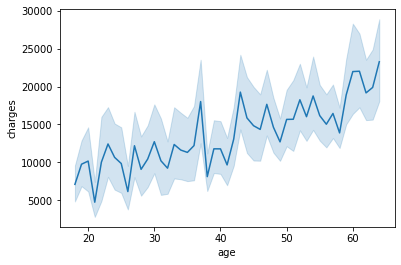

In [4]:
sns.lineplot(data=df, x="age", y="charges")

#### We can gather some observations from this visualization.
One major thing I notice is that our prediction about charges increasing with age seems to broadly be correct.

Another observation is that around age of 39, there seems to be a dip in charges. This is interesting because 39 was the mean of our age calculations. It seems intuitive to assume that this might mean we have more data points around 39, leaving to a more accurate charge calculation around the range of 38-41, but just to double check our age distribution I am going to create a violin plot to check out how our age is distributed.

<AxesSubplot:xlabel='age'>

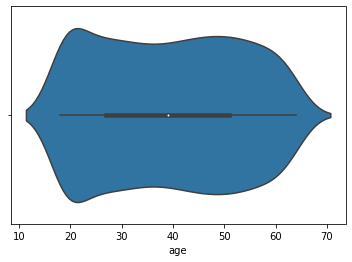

In [5]:
sns.violinplot(data = df, x = df['age'] )

#### From looking at this distribution graph, we can falsify our previous prediction.
It seems that there are actually more data points in their early 20s than closer to 39. So our previous explanation of the dip around 39 in the line plot can be proven untrue.

#### Moving on, I will attempt to answer the second research question.
Once again to avoice the problem of choosing bin sizes that may or may not lead to an unrepresentative reading of the data, I will be using a line plot to plot the relationship between BMI and charges.

<AxesSubplot:xlabel='bmi', ylabel='charges'>

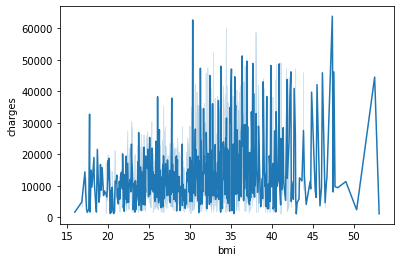

In [6]:
sns.lineplot(data=df, x="bmi", y="charges")

#### Looking at this visualization, a few things stick out immediately
First of all, It seems that our data points are very congregated within BMI < 40, and over that the data gets a little more spotty. To double check this I will quickly do another violin plot to analyze the distribution of data within BMI range.

<AxesSubplot:xlabel='bmi'>

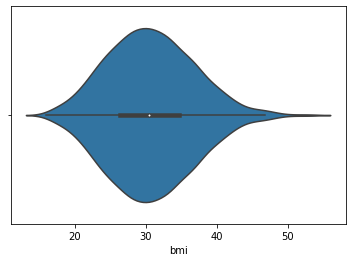

In [7]:
sns.violinplot(data = df, x = df['bmi'] )

#### As we could have predicted from looking at the previous line graph, it seems that the vast majority of data points reside between 20 and 40 BMI

This helps us interpret the results of the line graph above a little more easily. Notably, we can notice right away that shortly after a BMI of 30 the chart jumps significantly up and after that, while going back down, still seems to trend above where it did below 30. 

#### Our third research question explores the relation between age and BMI, we predict that older patients had a higher BMI as compared to younger patients

<AxesSubplot:xlabel='age', ylabel='bmi'>

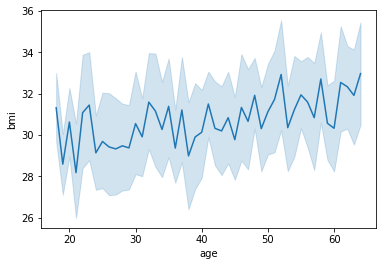

In [8]:
sns.lineplot(data=df, x="age", y="bmi")

From the plot above, we can see that there is a general upwards trend that shows older patients have a higher BMI, therefore we accept our prediction

Additionally, we can see that there is a constant region between 25-30 years, this could suggest there were less test subjects in that age group and is confirmed by the *age* violinplot above, there is a narrowing in the stated region. This however does not affect the correlation pattern. 

#### Next we look at the trend in charges

We predict that most patients had a high charge, and to see the distribution of charges we will plot a histogram

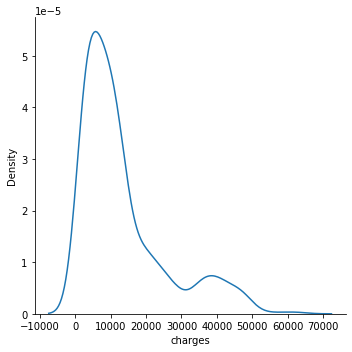

In [11]:
sns.displot(data=df, x=df["charges"], kind="kde")

From the distribution we can see that it is quite skewed to the left, suggeting that most of the data set had low charges. This is contrary to our prediction, and therefore we have to reject it, as most patients did not have high charges.

We can use a violinplot to further visualize the distribution of the charges

<AxesSubplot:xlabel='charges'>

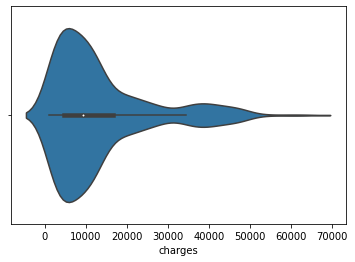

In [9]:
sns.violinplot(x=df["charges"], data=df)

From the violinplot we can see that there is a higher distribution between 0 and 15000, meaning most patients paid between 0 and 15000. We can therefore rsee more proof that rejects our prediction, and that most patients had low charges.

#### In the fifth question we explore whether there is a correleation between regions and number of cases. We predict that there is no relation between region and number of cases

We will use a bar plot to visualise count vs region

<AxesSubplot:xlabel='region', ylabel='count'>

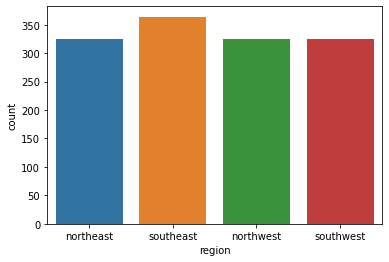

In [12]:
sns.countplot(data=df, x=df["region"])

From the graph above we can see that each region has counts indeendent of the other regions, thereofre we accept our prediction that cases in each region are independent.

#### For the next series questions we will be focusing on smoking relative to charges.

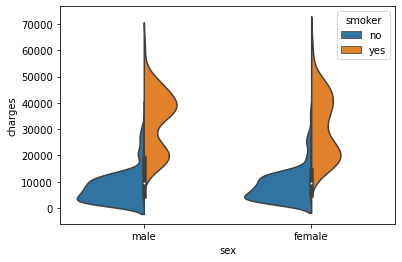

In [30]:
sns.stripplot(x='region',y='charges',data=df, hue='smoker', 
             palette='seismic')

sns.violinplot(x='sex',y='charges',data=df, hue='smoker',split=True)

#### here we can see that there is a clear correlation between smoking and higher charges using the split violin plot, as well as there is no discernable difference by sex

#### Now we can look at how the mean charges line up for question 8

32050.23183153285
8434.268297856199


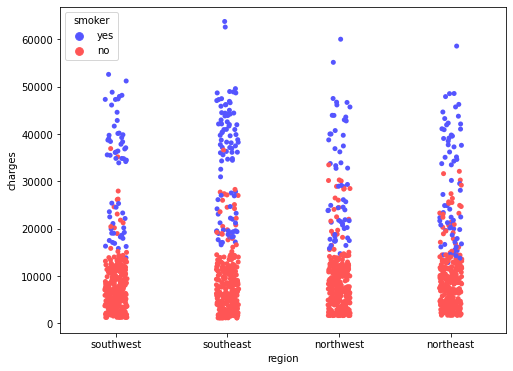

In [70]:
plt.figure(figsize=(8,6))
sns.stripplot(x='region',y='charges',data=df, hue='smoker', 
             palette='seismic')


####  It is easy to see the huge difference in mean cost and even relative to region it is the same
#### now we move on to the 9th question

38.51459854014598
39.38533834586466


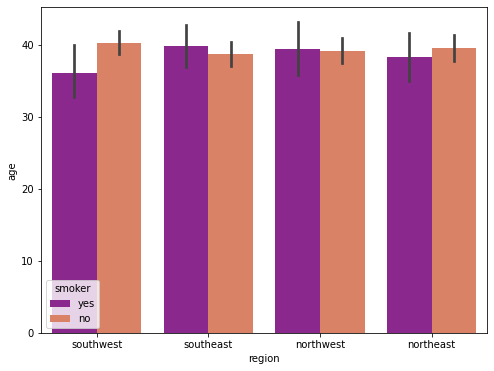

In [77]:
plt.figure(figsize=(8,6))
sns.barplot(x='region',y='age',data=df, hue='smoker', 
             palette='plasma')


#### Using the same method as before we see surprisingly minimal difference with the bar plot so we can conclue the age is not a factor in the overall charges